# Simple Classifer: QDA

In [4]:
import pandas as pd

# import sk-learn libraries
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay

import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("../../data/dataset0.csv", index_col = [0]) # 7 to 43 #, usecols= [no for no in range(7, 43)]
data

,position,sequence,mean_feature_1,median_feature_1,min_feature_1,max_feature_1,mean_feature_2,median_feature_2,min_feature_2,max_feature_2,...,mean_feature_8,median_feature_8,min_feature_8,max_feature_8,mean_feature_9,median_feature_9,min_feature_9,max_feature_9,gene_id,label
transcript_id,,,,,,,,,,,,,,,,,,,,,
ENST00000000233,244,AAGACCA,0.008264,0.00697,0.00199,0.0339,4.223784,3.73,1.770,13.40,...,4.386989,3.440,0.773,15.50,80.570270,80.50,73.1,88.3,ENSG00000004059,0
ENST00000000233,261,CAAACTG,0.006609,0.00564,0.00199,0.0222,3.216424,2.88,0.919,17.00,...,3.016599,2.660,0.715,14.10,94.290698,94.10,88.6,103.0,ENSG00000004059,0
ENST00000000233,316,GAAACAG,0.007570,0.00631,0.00232,0.0299,2.940541,2.65,1.280,11.60,...,2.087146,1.910,0.630,6.85,89.364324,89.20,84.4,96.2,ENSG00000004059,0
ENST00000000233,332,AGAACAT,0.010620,0.00902,0.00232,0.0370,6.476350,5.73,1.220,14.20,...,2.236520,2.135,0.884,6.49,89.154000,89.90,81.4,95.7,ENSG00000004059,0
ENST00000000233,368,AGGACAA,0.010701,0.00896,0.00199,0.0478,6.415051,6.52,1.150,39.00,...,4.260253,4.160,1.040,8.81,85.178788,85.40,77.6,90.5,ENSG00000004059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENST00000641834,1348,GGGACAT,0.009594,0.00817,0.00232,0.0432,3.294164,3.20,0.924,6.00,...,4.005616,3.640,1.030,12.50,82.004110,82.10,74.0,92.8,ENSG00000167747,1
ENST00000641834,1429,CTGACAC,0.008393,0.00618,0.00232,0.0262,4.511014,3.69,1.770,10.30,...,3.644638,3.440,1.580,6.50,80.497101,80.60,75.0,90.6,ENSG00000167747,0
ENST00000641834,1531,TGGACAC,0.008161,0.00697,0.00232,0.0315,3.918438,3.83,1.400,6.77,...,2.181562,1.925,1.040,7.19,84.190625,84.50,78.2,88.1,ENSG00000167747,1


In [6]:
X = data.drop(columns=['position','sequence','label'])
y = data['label']
groups = data['gene_id']

gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=21)

for train_idx, test_idx in gss.split(X, y, groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

X_train = X_train.drop(columns=['gene_id'])
X_test = X_test.drop(columns=['gene_id'])

# QDA

In [7]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [8]:
score = qda.score(X_test, y_test)
y_pred = qda.predict(X_test)
score

0.9193169356102147

Text(0.5, 1.0, 'Confusion Matrix for QDA')

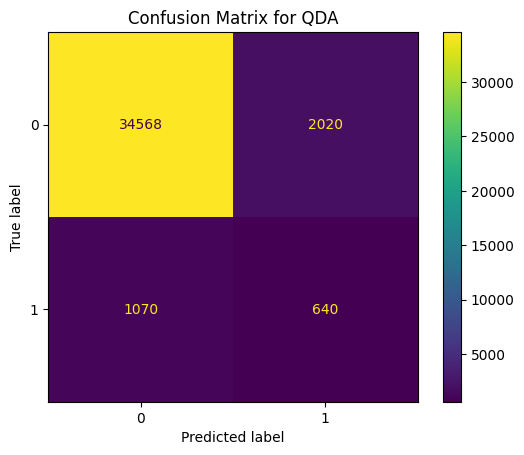

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('Confusion Matrix for QDA')

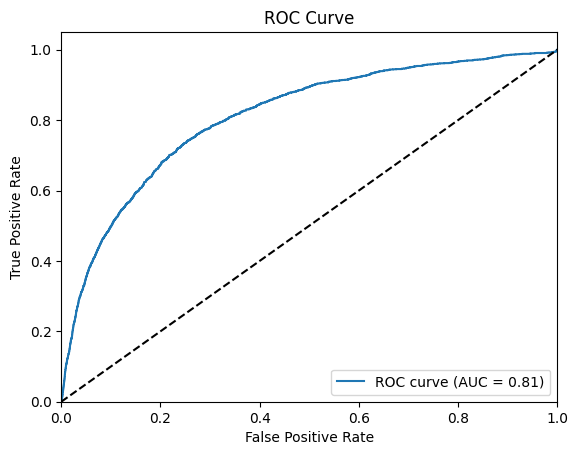

In [10]:
y_prob = qda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# QDA (with Undersampling)

In [11]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=21)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_train_resampled)}")


Original class distribution: Counter({0: 79775, 1: 3765})
Resampled class distribution: Counter({0: 3765, 1: 3765})


In [12]:
qda.fit(X_train_resampled, y_train_resampled)

QuadraticDiscriminantAnalysis()

In [13]:
score = qda.score(X_test, y_test)
y_pred = qda.predict(X_test)
score

0.6766410778630738

Text(0.5, 1.0, 'Confusion Matrix for QDA')

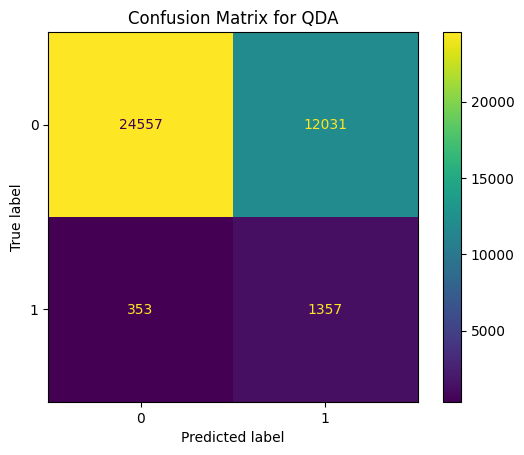

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('Confusion Matrix for QDA')

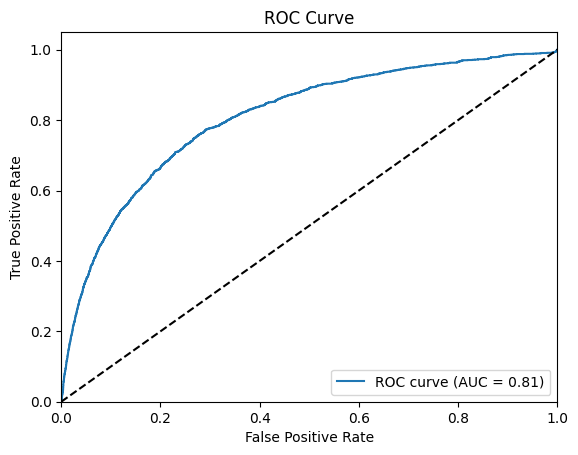

In [15]:
y_prob = qda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# QDA (with Oversampling)

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=21)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Resampled class distribution: {Counter(y_resampled)}")


Resampled class distribution: Counter({0: 79775, 1: 79775})


In [17]:
qda.fit(X_resampled, y_resampled)

QuadraticDiscriminantAnalysis()

In [18]:
score = qda.score(X_test, y_test)
y_pred = qda.predict(X_test)
score

0.7287325708914304

Text(0.5, 1.0, 'Confusion Matrix for QDA')

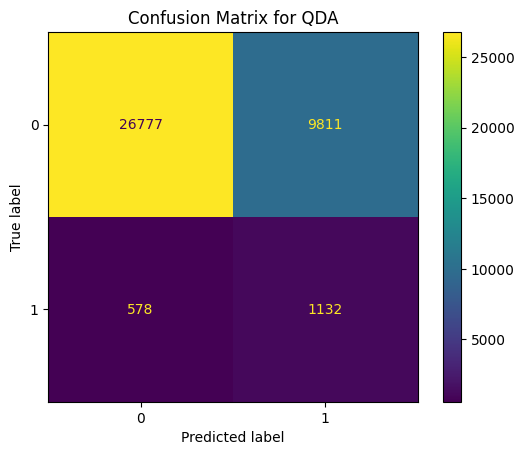

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('Confusion Matrix for QDA')

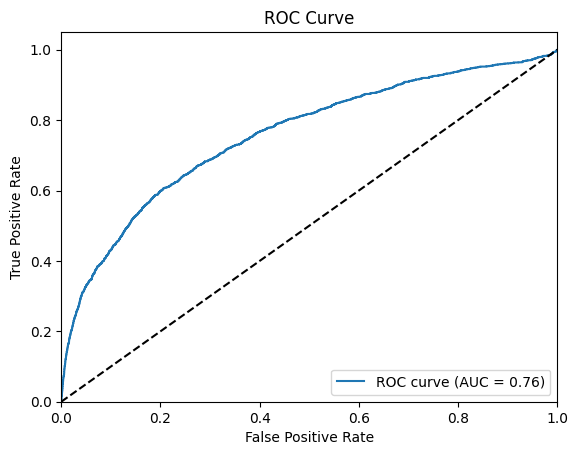

In [20]:
y_prob = qda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()